In [21]:
from matplotlib import pyplot as plt
import csv
import pandas as pd
from datetime import datetime, timedelta
import os
from time import time

In [22]:
file_by_days="./data/reduced/days.csv"
file_by_hours="./data/reduced/hours.csv"
file_by_weekdays="./data/reduced/weekdays.csv"

In [30]:
df_by_days = pd.read_csv(file_by_days)
df_by_hours = pd.read_csv(file_by_hours)
df_by_weekdays = pd.read_csv(file_by_weekdays)

In [31]:
df_by_days.head(1)

,tag,tag_value,rides_count,passenger_count_mean,passenger_count_median,trip_distance_sum,trip_distance_mean,trip_distance_median,tip_amount_sum,tip_amount_mean,tip_amount_median,humidity_mean,humidity_median,pressure_mean,pressure_median,wind_speed_mean,wind_speed_median
0,days,2014-01-02,420810,1.828086,1.0,1389465.3,3.301883,2.0,512187.03,1.217146,0.0,78.710173,80.0,1024.091167,1026.0,1.91542,2.0


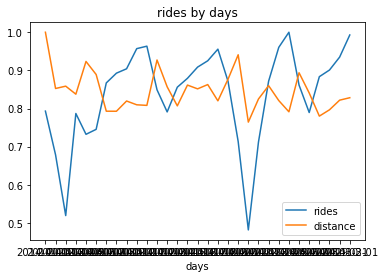

In [53]:
# normilize data
for_plot = df_by_days.copy()
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

fig, ax = plt.subplots()
ax.plot(for_plot["tag_value"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["tag_value"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('days')
ax.set_title("rides by days")
ax.legend() 

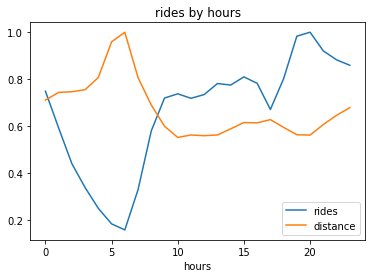

In [59]:
# rides by hour

for_plot = df_by_hours.copy()
for_plot["hr"] = for_plot[["tag_value"]].applymap(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)
for_plot = for_plot.groupby('hr').agg({'rides_count':'sum', 'trip_distance_mean':'mean'})

# normilize data
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

for_plot = for_plot.reset_index()

fig, ax = plt.subplots()
ax.plot(for_plot["hr"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["hr"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('hours')
ax.set_title("rides by hours")
ax.legend()


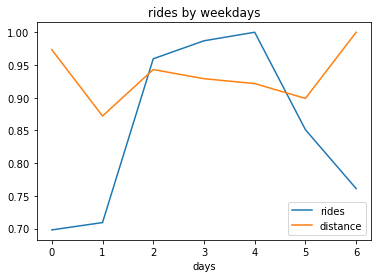

In [60]:
# rides by weekdays

# normilize data
for_plot = df_by_weekdays.copy()
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

fig, ax = plt.subplots()
ax.plot(for_plot["tag_value"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["tag_value"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('days')
ax.set_title("rides by weekdays")
ax.legend() 
